<a href="https://colab.research.google.com/github/amifunny/Deep-Learning-Notebook/blob/master/Image_GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np

from PIL import Image
import os
import matplotlib.pyplot as plt
from IPython import display

In [0]:
"""
    Original GAN paper -- 'https://arxiv.org/abs/1406.2661'
    But these GAN are hard to train.

    So some tried and tested rule of thumbs shuld be followed to get results.
    This Notebook follow these hacks -- 'https://github.com/soumith/ganhacks'

    This Notebook is based on DCGANs paper -- 'https://arxiv.org/abs/1511.06434'

"""

In [0]:
"""
  FOR MNIST DATASET - DISCRIMINATOR MODEL
"""

inputs = tf.keras.layers.Input((28,28,1))

out = tf.keras.layers.Conv2D( 64,(5,5),strides=(2,2), padding='same' )(inputs)
out = tf.keras.layers.LeakyReLU()(out)
out = tf.keras.layers.Dropout(0.3)(out)

out = tf.keras.layers.Conv2D( 128,(5,5),strides=(2,2) , padding='same' )(out)
out = tf.keras.layers.LeakyReLU()(out)
out = tf.keras.layers.Dropout(0.3)(out)

out = tf.keras.layers.Flatten()(out)
outputs = tf.keras.layers.Dense( 1 )(out)

D_model=0
D_model = tf.keras.Model(inputs=inputs,outputs=outputs)
D_model.summary()

In [0]:
"""
  FOR MNIST DATASET - GENERATOR MODEL
"""


inputs = tf.keras.layers.Input((100,))

out = tf.keras.layers.Dense(7*7*256)(inputs)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.LeakyReLU()(out)

out = tf.keras.layers.Reshape(target_shape=(7,7,256))(out)

out = tf.keras.layers.Conv2DTranspose(128,(5,5),strides=(1,1),padding="same",use_bias=False)(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.LeakyReLU()(out)

out = tf.keras.layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding="same",use_bias=False)(out)
out = tf.keras.layers.BatchNormalization()(out)
out = tf.keras.layers.LeakyReLU()(out)

outputs = tf.keras.layers.Conv2DTranspose(1,(5,5),strides=(2,2),use_bias=False,activation='tanh',padding="same")(out)

G_model = 0
G_model=tf.keras.Model(inputs=inputs,outputs=outputs)
G_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_6 (Batch (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 12544)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_7 (Batch (None, 7, 7, 128)         512 

(1, 28, 28, 1)


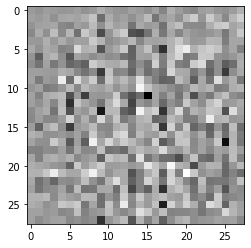

In [0]:
try_gen = G_model( tf.random.normal([1,100]) , training=False )
print(try_gen.shape)
show = plt.imshow( try_gen[0,:,:,0]*127.5+127.5 ,cmap='gray' )
plt.show()

In [0]:
import tensorflow_datasets as tfds
raw_data,info = tfds.load('mnist',split=['train','test'],with_info=True)

print(info)

In [0]:
train_data,test_data = raw_data[0],raw_data[1]

def map_func(data):

  img = ( tf.cast( data['image'] , tf.float32 )-127.5 )/127.5
  return img

train_data = train_data.map( map_func )

train_data = train_data.shuffle(10000)
train_data = train_data.batch(256)

for one_b in train_data.take(1):
  show = plt.imshow(one_b[0,:,:,0],cmap='gray')
  plt.show()
  print( one_b.shape )
  print( one_b[0,:,:,0])

In [0]:
seed = tf.random.normal([ 16 , 100 ])

In [0]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

********* EPOCH :: 0


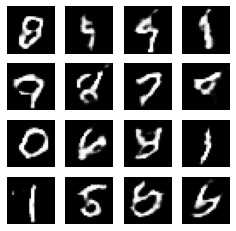

ye 1 hona chahiye : [-0.27365434  0.45421708  1.8091422   2.335114   -0.6513377   1.1047796
  1.5983499  -1.5687606   0.39407855  0.47574133]
ye 0 hona chahiye : [-0.4562125  -0.7184551  -0.12584421  0.41042566 -1.2457017  -1.4470503
  0.10764292 -0.6755323   0.39146748 -0.04713814]
D_Loss is === >  1.0493932962417603
G_Loss is === >  1.0555332899093628
ye 1 hona chahiye : [ 0.5187915  -0.3747219   0.84025496  0.6128345   0.40770337  0.33833593
  1.317221    1.0199653   0.8477673  -0.06192712]
ye 0 hona chahiye : [-2.0066287e-01 -8.8484716e-01 -4.4455138e-01 -1.3725175e+00
  8.8901073e-04 -1.1562289e+00  2.4956861e-01  3.7607786e-01
 -4.7672001e-01 -1.0733907e+00]
D_Loss is === >  1.1581995487213135
G_Loss is === >  0.9805128574371338
ye 1 hona chahiye : [ 0.56927365  1.2014323  -0.47509056 -0.37740132 -1.007284   -1.0256377
 -1.1688303  -1.8439177   0.1905552  -0.47475508]
ye 0 hona chahiye : [ 0.7163305  -0.66073066 -0.9398168  -0.81198686 -0.5696917  -0.33563974
 -0.13783586 -1.5438

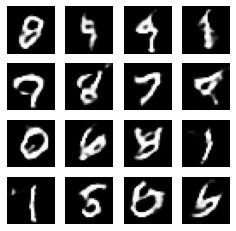

ye 1 hona chahiye : [ 2.280926    0.16089791  0.68202657  1.5959775   1.3759559  -0.28778052
  0.45373127  0.58753747  0.989469    0.93130904]
ye 0 hona chahiye : [-0.50096124  1.2068478   0.33129528 -1.3347474   0.716146   -1.5886356
 -0.65511197 -1.4250228  -0.9411455   0.10948728]
D_Loss is === >  1.211723804473877
G_Loss is === >  0.9440019726753235
ye 1 hona chahiye : [-1.3050624  -0.52404135  0.37081692 -1.9335426   1.3097647   0.99533266
 -1.1040932  -0.55741686  0.1369186   0.8908542 ]
ye 0 hona chahiye : [ 0.30036834 -0.46268752 -0.5764139  -0.1832723   1.1119065  -1.0880678
  0.07700951  0.06453197  0.7751002   0.05035075]
D_Loss is === >  1.2676072120666504
G_Loss is === >  0.9392825961112976
********* EPOCH :: 2


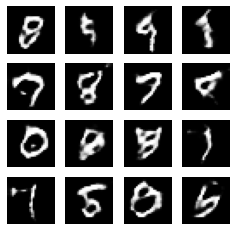

ye 1 hona chahiye : [ 0.7030215   0.4850782   0.10758288  1.8948864   1.2509462  -0.10090549
  0.4022796   0.97020656 -1.0503637   1.1781875 ]
ye 0 hona chahiye : [-0.3974779   0.03683357 -0.2914947  -0.65904564 -0.37462443  0.5657443
  0.2501547   0.95422083  0.5665056  -0.6431266 ]
D_Loss is === >  1.1542785167694092
G_Loss is === >  0.9180247187614441
ye 1 hona chahiye : [-1.5017117   0.5620195   1.3349617  -0.20833328  0.24415483  0.22616382
  0.45181248  0.28149652  1.2771437  -0.22660576]
ye 0 hona chahiye : [-0.92012507  0.45594734  1.4401655  -2.3771758   0.7893504  -0.7680465
  0.07793434 -0.1223822   0.35702828 -0.75674224]
D_Loss is === >  1.1890909671783447
G_Loss is === >  0.8998525142669678
ye 1 hona chahiye : [ 0.59777457  0.02868996  0.8992514   0.79347545 -0.29097927  0.06429902
  0.37328485 -0.1770071   0.55935764  0.7429265 ]
ye 0 hona chahiye : [-0.06171812  0.5322823   2.2516766   0.6216576  -1.2068738  -0.8128855
 -0.655223    0.9080013  -1.0528128  -1.1724156 ]
D

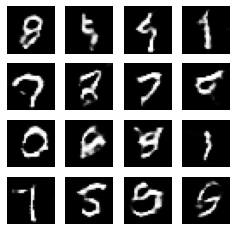

ye 1 hona chahiye : [ 1.9810127   0.10867732  0.2754794   2.0952127   0.58123654  0.7281697
 -0.37458202 -1.3320081   2.7216463  -0.00975627]
ye 0 hona chahiye : [-2.0594196  -0.52404463 -1.7960173  -2.1641238  -1.3718097  -0.5758135
 -0.49499854 -0.13404462  0.67576057 -0.4067497 ]
D_Loss is === >  1.1531505584716797
G_Loss is === >  1.1519746780395508
ye 1 hona chahiye : [ 1.5689728   0.37807724 -1.387107    1.4113083  -0.14250545 -1.3728044
  3.4151158  -0.3333859   3.0696332   0.27674314]
ye 0 hona chahiye : [ 0.98727196 -1.3014541  -2.30329     2.5924768   0.6636422  -1.5266361
  1.4414825  -0.84721744 -0.15890898  1.4740611 ]
D_Loss is === >  1.1941356658935547
G_Loss is === >  0.9464031457901001
********* EPOCH :: 4


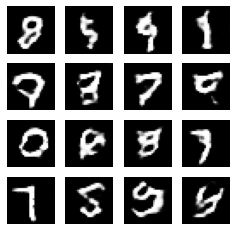

ye 1 hona chahiye : [ 0.1626252   1.4610263  -0.07402078 -2.0979419   2.1253674  -2.1488237
  0.17853105  0.7831163   2.2404704  -0.5780304 ]
ye 0 hona chahiye : [ 0.817237   -1.2926303  -0.28171074 -0.18105361 -1.9582499  -0.36141706
  0.04905071 -0.21296719  0.9962704  -0.96029365]
D_Loss is === >  1.3785486221313477
G_Loss is === >  0.9114641547203064
ye 1 hona chahiye : [ 3.2479787  -1.6226585   1.7218717   1.0311203   2.0452516  -0.13829738
 -1.4204575   0.9460783   4.0157313  -0.45415565]
ye 0 hona chahiye : [-0.9229927   0.49406636 -0.05377677 -2.7895086   1.6216078   1.22774
 -1.793947   -2.490241   -0.3897345  -0.6553389 ]
D_Loss is === >  1.1679749488830566
G_Loss is === >  1.1307250261306763
********* EPOCH :: 5


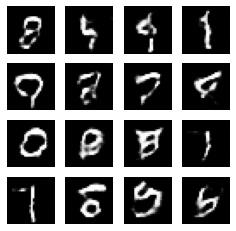

ye 1 hona chahiye : [ 2.0660157   0.14977635  1.558902    0.33846742  1.6714803   0.54628897
  1.7192194   0.2706078  -1.2937499   2.159577  ]
ye 0 hona chahiye : [ 0.6842935  -0.96494853 -0.09337784 -0.52293843 -0.04586257 -2.986634
 -1.4277611  -1.1827383  -0.7695236  -1.1580555 ]
D_Loss is === >  1.1431019306182861
G_Loss is === >  1.0786709785461426
ye 1 hona chahiye : [ 0.23972282 -0.46153805 -1.3259248   1.0670098  -0.01244536  2.346008
  1.7746341  -0.56346375 -0.63808805  1.6923935 ]
ye 0 hona chahiye : [ 0.29161954  0.6468372   0.07246184 -0.5577106  -0.55201405 -0.9707276
  0.06413858  0.91843694 -0.7780918  -0.86193794]
D_Loss is === >  1.1881024837493896
G_Loss is === >  0.9831883311271667
ye 1 hona chahiye : [ 2.0496585   0.40588585  0.6560427   0.90706956 -0.6185449   0.47490388
  0.87282574  0.7338827  -0.6509302   1.6307694 ]
ye 0 hona chahiye : [-0.9882218  -0.83000267 -0.24919395 -0.21529636 -0.5175996  -2.5792239
  0.42616764 -1.2569364   0.27336183 -1.6566331 ]
D_Lo

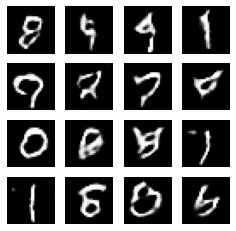

ye 1 hona chahiye : [ 1.4206122   0.57952666  0.82364404  0.66419196  0.47944936  0.08949572
  0.32785824 -0.33946446  0.6223841  -0.41677368]
ye 0 hona chahiye : [-0.90562093  0.22446474 -1.6172961  -1.7253584   0.32105562 -1.1157969
 -0.5344907  -0.59909666  0.21028377 -0.9462378 ]
D_Loss is === >  1.2879189252853394
G_Loss is === >  0.9225616455078125
ye 1 hona chahiye : [-1.3861808  -1.1840012   0.03196642  0.27768448 -0.00583226  0.2490779
 -0.4171105  -0.09478983 -0.66426456 -1.3747044 ]
ye 0 hona chahiye : [ 0.3523913   0.6627937  -1.0912716  -0.30675942 -0.4134243  -1.9638971
 -0.37800413  0.37421197  0.9773014   0.45922652]
D_Loss is === >  1.27420973777771
G_Loss is === >  0.8928239345550537
********* EPOCH :: 7


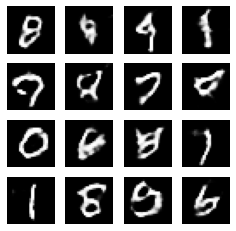

ye 1 hona chahiye : [ 0.6376181   0.10931973  1.9403272   0.5476405  -0.6555485   0.43190214
  0.3377621   0.10894626 -0.73106116 -0.77057797]
ye 0 hona chahiye : [-1.1662472   0.40535083 -0.21214812  0.4312913   0.18422732  2.2403357
 -0.33141357  0.59713167  0.62354183 -0.837217  ]
D_Loss is === >  1.199095368385315
G_Loss is === >  0.9072009921073914
ye 1 hona chahiye : [-0.30346704 -0.578441    0.7313205  -0.43897727  0.6540719  -0.47592577
 -0.11645027  2.0059962   0.1411334   0.69868064]
ye 0 hona chahiye : [-0.95992875  0.25598523  1.3564447  -1.1729224   0.75767314 -1.9819629
 -0.00638223 -1.3928984  -0.4251455  -0.23575944]
D_Loss is === >  1.2559891939163208
G_Loss is === >  0.9176275134086609
********* EPOCH :: 8


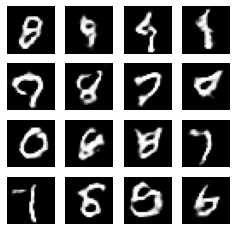

ye 1 hona chahiye : [ 0.21811451 -0.05476974 -0.03744831  0.9964804   0.36769253  0.09417341
 -0.5184484   1.3862643   0.08756847 -0.63619536]
ye 0 hona chahiye : [-0.0779931  -0.6330904  -0.99219525 -0.8468227  -0.17133419 -1.6917928
 -0.34340814 -0.7520307  -0.9627424   0.00898026]
D_Loss is === >  1.2195632457733154
G_Loss is === >  0.8780485391616821
ye 1 hona chahiye : [-0.2915816   0.5374344   0.4252822  -1.1176882   0.57626605  0.6386666
  0.34159535  0.18431085  0.72284156  1.2704895 ]
ye 0 hona chahiye : [-0.24517708 -0.41969004 -0.8587021  -1.5874945  -0.60217553 -0.9285993
 -0.70826185 -0.02333873 -0.98927957 -1.2008936 ]
D_Loss is === >  1.1879942417144775
G_Loss is === >  0.9334771633148193
ye 1 hona chahiye : [ 1.1550941   0.56852365  1.8991525  -0.03418685  1.5412614   0.13853903
  1.0805144   0.39807358  0.22467777 -1.1260612 ]
ye 0 hona chahiye : [-0.15864976 -1.0345187   1.1886961   0.16713879 -1.3342453   0.1699029
  0.3723383   0.4691113   0.34196654 -0.21302214]
D_

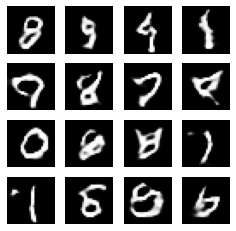

ye 1 hona chahiye : [-1.3668531  -1.426705    1.6163272   1.1347551  -0.21165568 -0.01459389
  1.6804564  -0.8023553  -0.48722702 -0.20497346]
ye 0 hona chahiye : [-1.2426375  -1.9373627  -1.527184   -1.1296806  -0.57477105  0.0906679
 -2.2358685  -1.1576736  -0.02456907 -1.6604354 ]
D_Loss is === >  1.2845447063446045
G_Loss is === >  1.0925827026367188
ye 1 hona chahiye : [ 0.5829175  -1.9808737  -0.2611593   0.90057427  0.54814225  0.3229956
 -1.1489979   0.36269712 -0.99741215  0.3201996 ]
ye 0 hona chahiye : [-0.18651518 -0.7511553  -0.46629095 -0.4610302  -0.6124281  -1.2615144
 -0.5886088  -0.25998944 -1.2107017  -0.20909889]
D_Loss is === >  1.2365299463272095
G_Loss is === >  0.9740858674049377
********* EPOCH :: 10


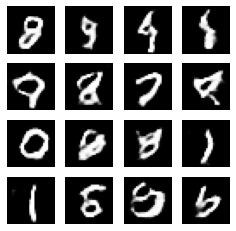

ye 1 hona chahiye : [ 0.22776134  0.40712932 -0.50844115  2.4410977   0.61351854 -0.27893084
  0.6872551  -0.75228125 -0.3223151  -0.00616847]
ye 0 hona chahiye : [-1.5376376   0.6016149  -1.1359416  -0.05568854 -0.33189732 -0.43647134
  0.92773825 -0.61545956 -1.4381369  -0.32587183]
D_Loss is === >  1.161533236503601
G_Loss is === >  0.9942176938056946
ye 1 hona chahiye : [-0.9284267   0.5217782   0.84060794  0.8487665   0.25656974  0.05575536
  2.21781     0.76251704  0.16205128  0.51621217]
ye 0 hona chahiye : [ 0.15153228 -0.76226264  0.23862381 -0.92300457  0.7924903  -1.0383077
  0.13278109  0.03006858  0.29994464 -0.8836196 ]
D_Loss is === >  1.2235603332519531
G_Loss is === >  1.0406856536865234
********* EPOCH :: 11


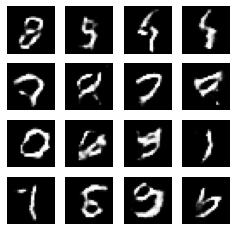

ye 1 hona chahiye : [ 0.3937802 -0.8735682  0.9627608  1.6764657  0.8758385 -0.8819454
  1.502496   0.8654495  1.5012736  2.9924743]
ye 0 hona chahiye : [-1.712812    0.12131995 -1.5809834  -0.79979324 -2.3421845   0.15831128
 -1.0628245  -1.1413488  -0.40177366 -1.3529246 ]
D_Loss is === >  1.0330866575241089
G_Loss is === >  1.136082410812378
ye 1 hona chahiye : [ 0.6609879  -0.02957975 -0.149789   -0.07059083  1.2608502  -0.26909345
 -0.5563455   1.328487    2.6740396   0.8534096 ]
ye 0 hona chahiye : [-0.91898584 -0.40922982 -0.31642944 -0.4803858   0.47957692 -1.591274
 -1.3396782  -0.7507291  -0.84431607 -0.884874  ]
D_Loss is === >  0.9285621643066406
G_Loss is === >  1.186470627784729
ye 1 hona chahiye : [ 0.34245518  0.27433193 -0.75364083 -0.39832622  0.74609625 -0.02848266
  0.12032758 -0.3748114   0.32580087  0.43481722]
ye 0 hona chahiye : [ 0.3235377  -0.8518797  -0.9692516   0.01601308  0.75893086  0.10110469
 -0.89778566  0.59255034  0.5481394  -0.13358253]
D_Loss is ==

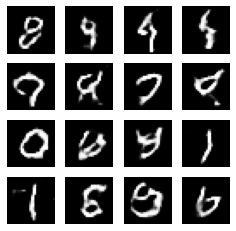

ye 1 hona chahiye : [-1.9938927e-03  4.0893131e-01  3.0394900e-01 -3.7269449e-01
  4.9408972e-01  1.6305499e+00 -9.3300807e-01 -1.5768559e+00
 -1.0286469e+00 -2.3281040e+00]
ye 0 hona chahiye : [-2.209377   -0.28300524  0.406213    0.6421749  -0.99604946 -0.9542559
 -0.93159676 -1.0795221  -0.6648217  -1.0379897 ]
D_Loss is === >  1.3027820587158203
G_Loss is === >  0.9509086012840271
ye 1 hona chahiye : [ 0.79082036 -0.18045484  0.06164642  0.07123698  0.28064117  0.14010507
  0.04397076  1.6861808   0.01082797  2.4521637 ]
ye 0 hona chahiye : [-0.16843532 -0.16770095 -0.9393971   0.08949853  0.27440226  0.18449022
 -1.4712287  -0.50862736 -1.0696853  -0.7252534 ]
D_Loss is === >  1.2086142301559448
G_Loss is === >  1.0186676979064941
********* EPOCH :: 13


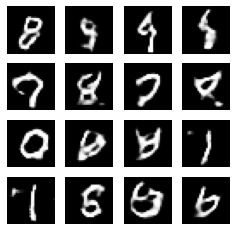

ye 1 hona chahiye : [-0.9742611   1.0489242  -0.23601592  0.65810263  0.63520104  0.474986
 -0.33915165 -1.1537846  -0.4925426   0.6068754 ]
ye 0 hona chahiye : [-1.2912631  -1.5534618   0.31301203 -0.26725927 -0.65023506  0.6163002
 -0.7206051  -0.7646685  -0.43033016  1.4126128 ]
D_Loss is === >  1.2610645294189453
G_Loss is === >  0.8688034415245056
ye 1 hona chahiye : [ 2.1388102   1.0716803  -1.1496952  -0.10493243  1.212872   -1.9768887
 -0.5997879  -0.95943385 -2.0905354  -0.28722417]
ye 0 hona chahiye : [-0.46941543  0.46627325  0.1008371   0.07166293 -0.28240377 -0.69135934
 -1.2867427   0.60862774  0.8035415   0.23420757]
D_Loss is === >  1.2420151233673096
G_Loss is === >  0.9106529951095581
********* EPOCH :: 14


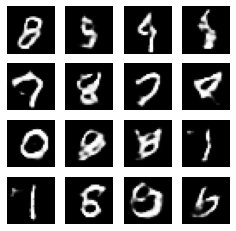

ye 1 hona chahiye : [ 1.0227618   0.42521176 -0.8158248   1.2048041   1.5997274   0.24731924
 -2.2290618   1.5564873   0.03146521 -1.4160613 ]
ye 0 hona chahiye : [-0.6143507  -0.6078645  -0.199803   -0.37711456  0.6053     -1.5499803
 -0.38094    -0.71615905  1.0275409   0.54898196]
D_Loss is === >  1.2582228183746338
G_Loss is === >  0.9585590362548828
ye 1 hona chahiye : [ 1.1357936  -0.10031507  1.4060683   2.767637    0.8947316   0.9395946
 -0.23387375  0.51762265 -1.1095537  -0.3911217 ]
ye 0 hona chahiye : [-0.61314225 -1.0054818  -0.63201207  0.5809332   0.53651047 -0.7919753
  0.56956035  0.08472893 -0.88034636 -0.5167382 ]
D_Loss is === >  1.1505517959594727
G_Loss is === >  0.9748833775520325
ye 1 hona chahiye : [ 1.1017264  -0.27594438 -0.70608836  0.9135068  -1.2417306   0.87752295
 -1.0228678  -1.9578446  -0.08700924  2.231452  ]
ye 0 hona chahiye : [-0.18329439 -0.65920335  0.00216785 -1.0509585   1.4289277   0.59868395
 -1.0962306  -0.00482688 -0.55891806  1.0094075 ]
D

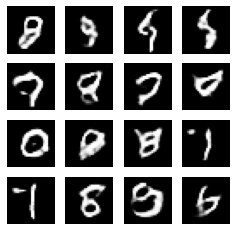

ye 1 hona chahiye : [-0.3227346  -0.20059595  0.10037024  0.63804144  0.9590226   0.39827695
  0.17174083  0.28207597  1.2084275   0.6163718 ]
ye 0 hona chahiye : [-0.2602517  -0.7154525   1.025111    0.7753474  -0.04828874 -0.76980186
 -0.5758487  -0.805325   -0.077391    0.2166161 ]
D_Loss is === >  1.2439508438110352
G_Loss is === >  0.8723664283752441
ye 1 hona chahiye : [ 0.24969518  0.6530547  -2.8007588  -0.80006206  0.40201372  0.6111918
  1.04061    -0.9585043   0.04560185  0.26513076]
ye 0 hona chahiye : [-0.6135264   0.35978186  0.3078131   0.49015993 -0.8107647   0.28897244
  0.34067398  0.09066921  0.55114466  0.50104076]
D_Loss is === >  1.2803975343704224
G_Loss is === >  0.8869689106941223
********* EPOCH :: 16


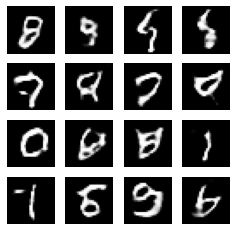

ye 1 hona chahiye : [ 1.1640143   0.5840495   0.21273911 -0.7898164  -0.07799137  0.8117379
  2.1437025   1.2135519  -0.59766126  0.357736  ]
ye 0 hona chahiye : [-0.16328847  0.2421757  -0.5485214   0.42581755 -0.25875527 -0.69056773
 -0.7617679   1.4083534  -0.8863456  -1.6837451 ]
D_Loss is === >  1.221510648727417
G_Loss is === >  0.9147289991378784
ye 1 hona chahiye : [ 2.2027624  1.5859438 -1.1071308  1.9087337  0.830055   1.1411455
  0.3261492  1.7424194  1.0018864  2.0118616]
ye 0 hona chahiye : [ 0.44414154  0.1650471  -0.80567396 -0.7684655  -0.40910178  0.6237874
  0.09755282 -0.3428832  -0.3223041   0.03357289]
D_Loss is === >  1.0943193435668945
G_Loss is === >  0.9311444163322449
********* EPOCH :: 17


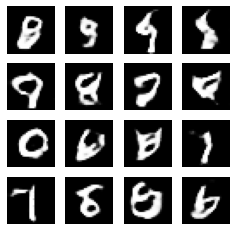

ye 1 hona chahiye : [ 2.4455845   0.5345278   2.306146   -0.04999953  0.48632044  1.2899538
  1.2868165   0.04024336  0.39326447  0.6328457 ]
ye 0 hona chahiye : [-0.6703335  -0.60452473 -1.7353659  -1.1011527  -0.9795134  -0.9882618
 -0.1469095  -1.9798682  -1.1054109  -0.13871786]
D_Loss is === >  1.0902718305587769
G_Loss is === >  1.2634975910186768
ye 1 hona chahiye : [ 0.4863165   0.79227066  1.0136894  -0.20037697  0.14180572 -1.2769868
  0.83158714  1.1067216   1.1746472   1.5601203 ]
ye 0 hona chahiye : [-0.8345584   0.8777165   0.4649235  -1.337794   -1.5689995  -0.03801201
  0.87174505 -0.9948447  -1.326273   -0.16215754]
D_Loss is === >  1.0074039697647095
G_Loss is === >  1.1055694818496704
ye 1 hona chahiye : [ 1.9682286   0.46804693 -0.47524863  0.29930174  0.12910694  0.77594364
 -0.76859975  0.10021041 -1.2460043  -1.1054654 ]
ye 0 hona chahiye : [ 0.78401136  1.1688222  -0.83279955 -0.801886   -0.28675202 -0.9944093
 -0.7722782  -1.0033957  -0.02946052 -0.7311415 ]
D_

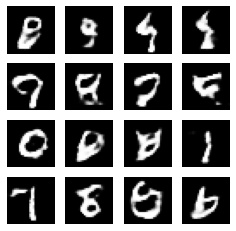

ye 1 hona chahiye : [ 0.63660765  1.3303642   1.0598521   0.96839935  1.7552975   0.25925702
  0.00324125  1.9244459  -1.5559717   0.8495995 ]
ye 0 hona chahiye : [ 0.8598654   0.02704354 -1.2255219   0.53311497 -0.9415922  -0.8279766
 -0.59965765 -0.78482836 -0.06614041  1.6011127 ]
D_Loss is === >  1.3500761985778809
G_Loss is === >  0.7880908250808716
ye 1 hona chahiye : [-0.11299182 -1.4793266   1.1167711   2.7713373  -0.6991201  -0.62091154
  0.55564207 -0.25674868 -1.6367087  -0.98542213]
ye 0 hona chahiye : [ 0.22880803  1.2699467   0.25435454  0.31440148 -0.96786964 -0.18462548
 -0.9434247  -0.05434133  0.2719504  -0.37982336]
D_Loss is === >  1.239243507385254
G_Loss is === >  1.0109241008758545
********* EPOCH :: 19


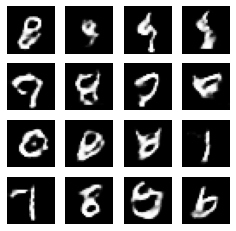

ye 1 hona chahiye : [ 0.3562537  -2.2992945   2.9506907   2.5807085   0.28047517  0.03497034
  2.2310305   0.33639398  1.8730868   0.2690514 ]
ye 0 hona chahiye : [-2.3539822   0.30363438 -0.82070524 -0.5459095  -0.57831    -0.93213594
 -1.3789829   1.1791219  -0.551837    0.5583987 ]
D_Loss is === >  1.2531006336212158
G_Loss is === >  0.9233797788619995
ye 1 hona chahiye : [ 0.8416478   1.576756    0.63101524  0.13935487  0.54627824 -1.0964553
  1.1253092   0.55726707  0.9317675  -0.15690716]
ye 0 hona chahiye : [ 0.036603   -0.13196832 -1.2431372  -0.76610947 -0.17029703  0.68364424
  0.61989367 -0.9749555   2.0798385   0.11259614]
D_Loss is === >  1.2081340551376343
G_Loss is === >  0.901543915271759


In [0]:
#********************
batch_size = 256
l_rate = 0.0001
ctr=0
epochs=20
# k -factor
k=1
#********************

d_optimizer = tf.keras.optimizers.Adam( l_rate )
g_optimizer = tf.keras.optimizers.Adam( l_rate )

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# tf abracted implementation. ( Its a bit Smooth !)
# def discriminator_loss(real_output, fake_output):
#     real_loss = cross_entropy(tf.ones_like(real_output), real_output)
#     fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
#     total_loss = real_loss + fake_loss
#     return total_loss

# def generator_loss(fake_output):
#     return cross_entropy(tf.ones_like(fake_output), fake_output)

# My implementation
def cost_gen(pred_prob):

    delta = 1e-8
    loss = (-1.0/pred_prob.shape[0])*tf.reduce_sum( tf.math.log(  1-tf.nn.sigmoid(pred_prob) ) + delta )
    return loss+delta

def cost_data(pred_prob):

    delta = 1e-8
    loss = (-1.0/pred_prob.shape[0])*tf.reduce_sum( tf.math.log( tf.nn.sigmoid(pred_prob) ) +delta )
    return loss+delta

def cost_fn_g(pred_prob):
    delta = 1e-8
    loss = (-1.0/pred_prob.shape[0])*tf.reduce_sum( tf.math.log( tf.nn.sigmoid(pred_prob) ) + delta )
    return loss+delta

with tf.device('/device:GPU:0'):

  for e in range(epochs):
    
    print("********* EPOCH :: {}".format(e))

    # display.clear_output(wait=True)
    generate_and_save_images(G_model,
                             e + 1,
                             seed)

    g_cost = 0

    for batch_true in train_data:
      
      batch_noise = tf.random.normal( (batch_size,100 ) )
      
      with tf.GradientTape(persistent=True) as tape:

        pred_true = tf.squeeze( D_model( batch_true , training=True ) )
        batch_false = G_model(batch_noise, training=True)
        pred_false = tf.squeeze( D_model(batch_false, training=True) )

        # d_cost = discriminator_loss(pred_true,pred_false)
        # g_cost = generator_loss(pred_false)

        cost_true = cost_data(pred_true)
        cost_false = cost_gen(pred_false)

        d_cost = (cost_true + cost_false)
        g_cost = cost_fn_g(pred_false)


      if ctr%100==0:

        print("Optimally 1 for D  : {}".format(pred_true[:10]))
        print("Optimally 0 for D : {}".format(pred_false[:10]))
        print("D_Loss is === >  {}".format(d_cost))
        print("G_Loss is === >  {}".format(g_cost))

      ctr = ctr+1
      
      if ctr%k==0:
        d_grads = tape.gradient( d_cost,D_model.trainable_variables )
        d_optimizer.apply_gradients(zip(d_grads,D_model.trainable_variables))

      g_grads = tape.gradient( g_cost,G_model.trainable_variables )
      g_optimizer.apply_gradients(zip(g_grads,G_model.trainable_variables))
    
